# Classification

## Naive Bayes classification

- Assumes that the features are conditionally independent given the target, simplifying the computation.
- Naive Bayes works with categorical (factor) predictors and outcomes.
- It asks, “Within each outcome category, which predictor categories are most probable?”
- It is calculated with the Bayes conditional probability formula.
- Three Naive Bayes classifiers:
  - **Bernoulli** Naive bayes: good at handling boolean/binary attributes, 
  - **Multinomial** Naive bayes: good at handling discrete values, like counts of words,
  - **Gaussian** Naive bayes: good at handling continuous/numeric values.


> [**Spam emails classifier**](https://github.com/matuneville/ml-projects/tree/main/projects)  



## Linear Discriminant Analysis

- Discriminant analysis works with continuous or categorical predictors, as well as with categorical outcomes.
- Using the covariance matrix, it calculates a linear discriminant function, which is used to distinguish records belonging to one class from those belonging to another.
- This function is applied to the records to derive weights, or scores, for each record (one weight for each possible class), which determines its estimated class.


In [23]:
import pandas as pd

loans = pd.read_csv('../../data/loan3000.csv')

loans.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [24]:
features = ['borrower_score', 'payment_inc_ratio']
target = 'outcome'

X = loans[features]
y = loans[target]

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

loans_LDA = LinearDiscriminantAnalysis()
loans_LDA.fit(X, y)
pd.DataFrame(loans_LDA.scalings_, index=X.columns)

,0
borrower_score,7.175839
payment_inc_ratio,-0.099676


In [28]:
pred = pd.DataFrame(loans_LDA.predict_proba(loans[features]),
                    columns=loans_LDA.classes_)
pred.head()

,default,paid off
0,0.553544,0.446456
1,0.558953,0.441047
2,0.272696,0.727304
3,0.506254,0.493746
4,0.609952,0.390048


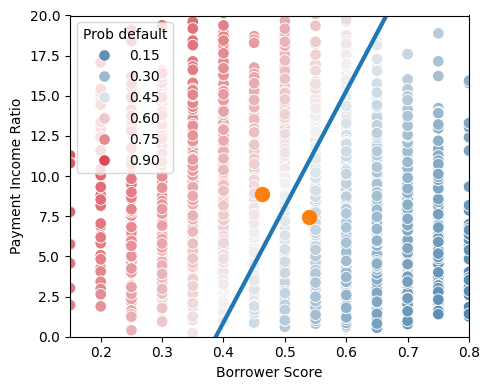

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use scalings and center of means to determine decision boundary
center = np.mean(loans_LDA.means_, axis=0)
slope = - loans_LDA.scalings_[0] / loans_LDA.scalings_[1]
intercept = center[1] - center[0] * slope

# Calculate payment_inc_ratio for borrower_score of 0 and 20
x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

# Concatenate predicted outcomes to the original data frame
lda_df = pd.concat([loans, pred['default']], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(5, 4))  # Adjust figsize as needed

# Scatterplot with color-coded points
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio',
                    hue='default', data=lda_df, s=70,
                    palette=sns.diverging_palette(240, 10, n=9, as_cmap=True),
                    ax=ax)
# Plot decision boundary
ax.plot((x_0, x_20), (0, 20), linewidth=3)
# Plot mean points
ax.plot(*loans_LDA.means_.transpose(), marker='o', markersize=10, linestyle='')

ax.set_ylim(0, 20)
ax.set_xlim(0.15, 0.8)
ax.set_xlabel('Borrower Score')
ax.set_ylabel('Payment Income Ratio')

ax.legend(loc='best', title='Prob default')
plt.tight_layout()
plt.show()


LDA prediction of loan default using two variables: a score of the borrower’s creditworthiness and the payment-to-income ratio.  

LDA splits the feature space into two regions, as shown by the solid line. The predictions farther away from the line in both directions have a higher level of confidence (i.e., a probability further away from 0.5).

## Logistic Regression

- Logistic regression is like linear regression, except that the outcome is a binary variable. The fit line will follow a sigmoid/logit function.
- As in linear regression, numeric features need to be transformed into categorical variables. One-hot encoding is a good choice for it.
- The model is fit by an iterative process, with the Maximum Likelihood Estimation algorithm (MLE) instead of the Least Squares used in linear regression.
- R² and RMSE are not metrics of logistic regression.
- Logistic regression is popular because it is computationally fast and produces a model that can be scored to new data with only a few arithmetic operations.

> [**Rainy weather classifier**](https://github.com/matuneville/ml-projects/tree/main/projects)  
